In [14]:
% matplotlib inline 

import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('gradient_data/src/')
from viz import *

import surfdist as sd
from surfdist import viz, load, utils, surfdist

# Geodesic distance from gradient peaks

In [2]:
import h5py, sys, io, numpy as np
import nibabel as nib 

surfmL = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf')
surfiL = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.L.very_inflated.32k_fs_LR.surf')
surfL = []
surfL.append(np.array(surfmL[0]*0.3 + surfiL[0]*0.7))
surfL.append(surfmL[1])

surfmR = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf')
surfiR = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.R.very_inflated.32k_fs_LR.surf')
surfR = []
surfR.append(np.array(surfmR[0]*0.3 + surfiR[0]*0.7))
surfR.append(surfmR[1])

sulcL = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[0:32492]
sulcR = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[32492:32492*2]

res = nib.load('gradient_data/templates/hcp.embed.all.179.lh.dscalar.nii').data
cortL = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
res = nib.load('gradient_data/templates/hcp.embed.all.179.rh.dscalar.nii').data
cortR = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
cortLen = len(cortL) + len(cortR)
del res

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [15]:
sns.set(style="white", color_codes=True)

def doDist(points, surf, cort, sulc, plotDist=None, zones=None, plots=None, output_file=None, showall=None):
    if len(np.shape(points)) > 1:
        dist = surfdist.dist_calc(surf, np.squeeze(cort), [np.concatenate(points)])
    else:
        dist = surfdist.dist_calc(surf, np.squeeze(cort), points)
    count=0
    if plotDist:
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, mask=cort, bg_on_stat=True, stat_map=(dist-dist.mean()) * -1, azim=0, alpha=1, symmetric_cbar=None)
        plt.show()
        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, mask=cort, bg_on_stat=True, stat_map=(dist-dist.mean()) * -1, azim=180, alpha=1, symmetric_cbar=None)
        plt.show()
        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1

    if zones:
        dist_vals = np.zeros((len(points), len(surf[0])))
        for n, p in enumerate(points):    
            dist_vals[n, :] = surfdist.dist_calc(surf, np.squeeze(cort), [p])
            print n
        zone = (np.argsort(dist_vals, axis=0)[0, :] + 1.) / len(points)
        zone = zone - np.mean(zone)
        
        aZ = []
        z0 = zone[surfR[1]][:,0]
        z1 = zone[surfR[1]][:,1]
        z2 = zone[surfR[1]][:,2]

        for n,i in enumerate(z0):
            if i != z1[n]:
                aZ.append(surfR[1][n])
            if i != z2[n]:
                aZ.append(surfR[1][n])
            if z1[n] != z2[n]:
                aZ.append(surfR[1][n])

        aZ = np.unique(aZ)
        
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=0, lenient=True)
        plt.show()
        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=180, lenient=True)
        plt.show()
        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1
        if showall:
            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=90, lenient=True)
            plt.show()
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1
            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=270, lenient=True)
            plt.show()
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1
            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, elev=90, lenient=True)
            plt.show()
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1
            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, elev=270, lenient=True)
            plt.show()
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1
            
    if plots != None:
        incld = np.where(dist[cort] != 0)[0]
        comp = {'dist':dist[cort][incld], 'embed':plots[incld]}
        g = sns.jointplot(x='dist', y='embed', data=comp, kind="hex").set_axis_labels("dist", "gradient")
        if output_file:            
            g.savefig(('Fig.%s' % str(count)) + output_file + '.pdf')
            count =+ 1

    
            
    return dist

def rmPoints(pts, rmPts):
    pts = list(pts)
    pts.remove(rmPts)
    pts = np.squeeze(np.array(pts, dtype=np.int32))
    return pts

In [16]:
# Load embedding results
emb = np.load('gradient_data/embedded/embedding_dense_cosine_emb.npy')

dataL = np.zeros((len(surfL[0]), emb.shape[1]))
dataL[cortL,:] = emb[0:len(cortL),:]
dataR = np.zeros((len(surfR[0]), emb.shape[1]))
dataR[cortR,:] = emb[len(cortL):cortLen,:]

In [24]:
d = dataL[:,0].squeeze().copy()
pts = np.where(d > np.percentile(d,95))[0]
d[d < np.percentile(d,95)] = 0
# showSurf(d, surfL, sulcL, cortL)

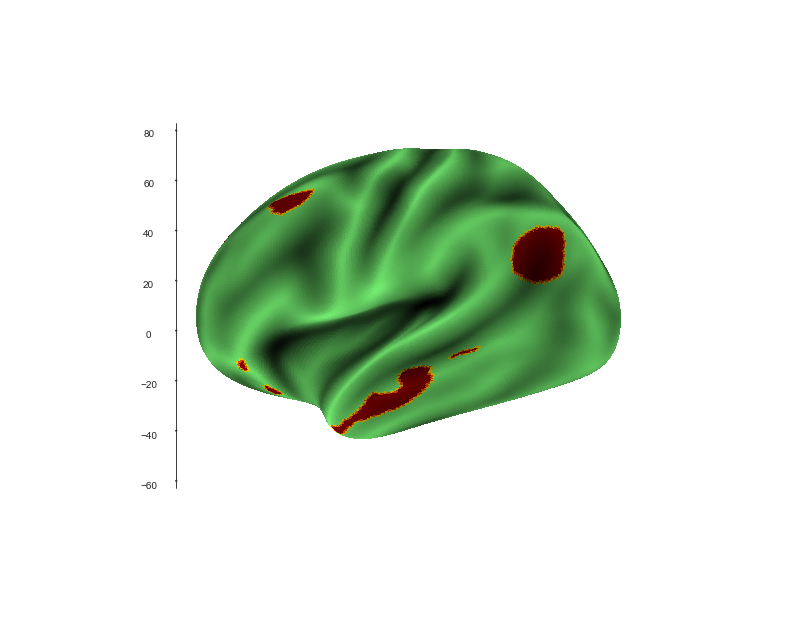

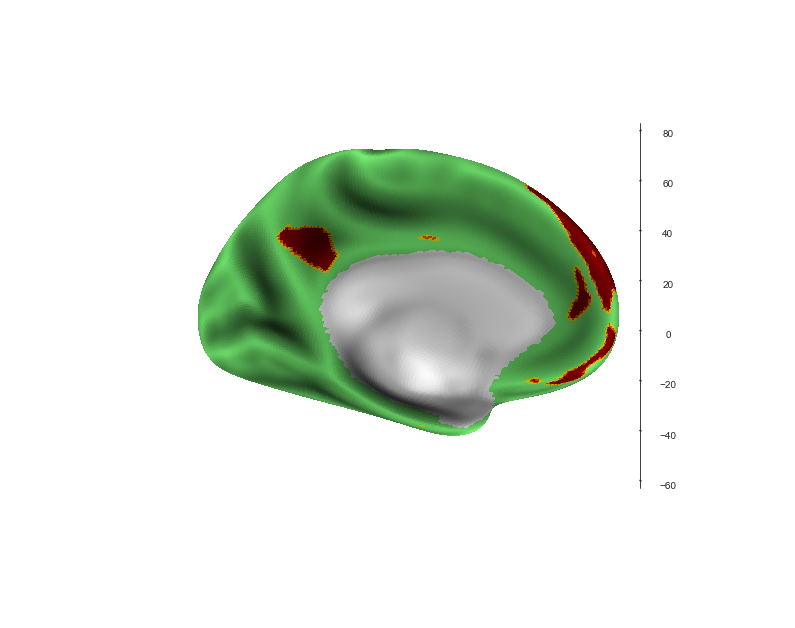

In [35]:
showSurf(d, surfiL, sulcL, cortL)

In [28]:
# Calculate distance
#di = doDist(pts, surfiL, cortL, sulcL, plotDist=False, zones=False) #, plots=emb[0:len(cortL),0])
distL = surfdist.dist_calc(surfL, np.squeeze(cortL), pts)

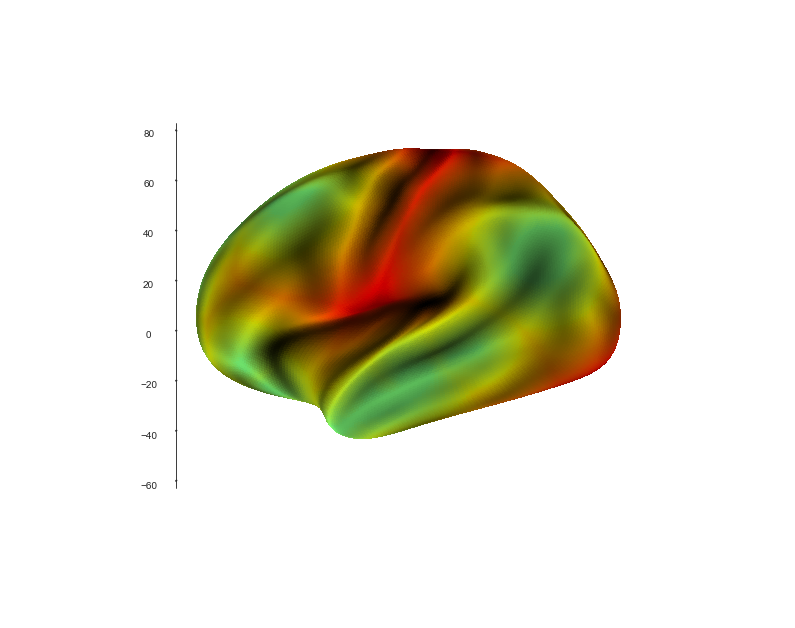

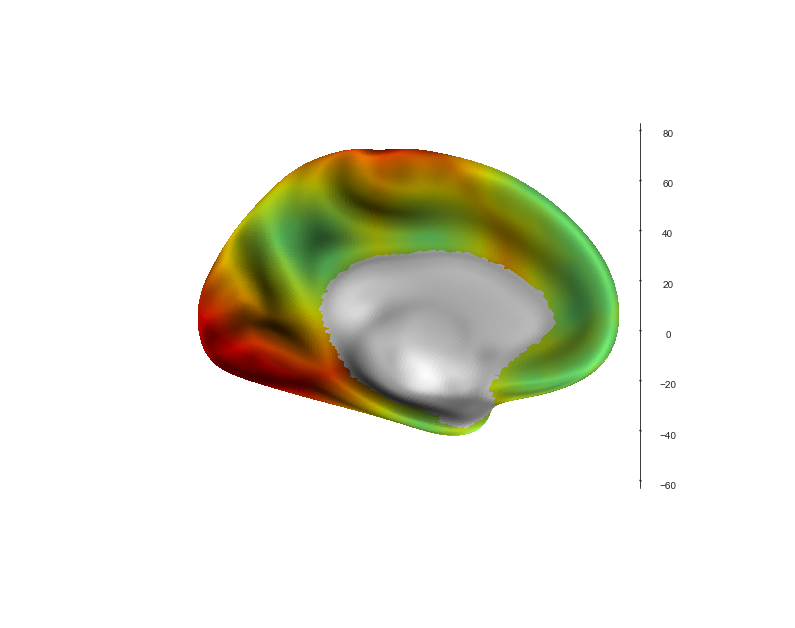

In [34]:
showSurf(distL, surfiL, sulcL, cortL)

# Macaque distance

In [ ]:
# distMacacque(ids[range(24)], 'fv')
def distMacacque(num, alt):
    '''
    num = [280, 352, 302]
    alt = 'fv'
    '''
    print lex[num]
    src_label = []
    dist_vals = np.zeros((len(num), len(cort)))
    for n in xrange(0,len(num)):
        src = utils.translate_src(np.squeeze(np.where(nodes[atlases.get(alt)] == num[n])), cort)
        src_label.append(np.squeeze(np.where(nodes[atlases.get(alt)] == num[n])))
        dist_vals[n, :] = gdist.compute_gdist(vertices, triangles, source_indices=np.array(src, dtype=np.int32))
        del src    
    
    src_label = np.concatenate(src_label)
    src_label_cort = np.zeros(len(surf[0]))
    src_label_cort[src_label] = 1
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=src_label_cort, mask=np.where(src_label_cort != 0.)[0], 
                       bg_on_stat=True, azim=0, label=True, lenient=True)
    plt.show()
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=src_label_cort, mask=np.where(data != 0.)[0], 
                       bg_on_stat=True, azim=180, label=True, lenient=True)
    plt.show()
        
    zone = utils.recort((np.argsort(dist_vals, axis=0)[0, :] + 1.) / len(num), surf, cort)
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=zone, mask=np.where(data != 0.)[0], 
                       bg_on_stat=True, azim=0, label=True, lenient=True)
    plt.show()
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=zone, mask=np.where(data != 0.)[0], 
                       bg_on_stat=True, azim=180, label=True, lenient=True)
    plt.show()

    dist = utils.recort(np.sort(dist_vals, axis=0)[0, :], surf, cort)
    dret = dist.copy()
    
    print np.max(dist[np.isfinite(dist)])
    dist = dist - np.mean(dist[np.isfinite(dist)])
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist, mask=np.where(data != 0.)[0], 
                       bg_on_stat=True, azim=0, label=True, lenient=True)
    plt.show()
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist, mask=np.where(data != 0.)[0], 
                       bg_on_stat=True, azim=180, label=True, lenient=True)
    plt.show()
    
    return dret, np.where(data != 0.)[0]

def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from scipy import eye, asarray, dot, sum, svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)